In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'Airline_Delay_Cause.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",85.0,8.0,4.00,0.49,...,0.0,0.00,2.0,0.0,417.0,245.0,35.0,137.0,0.0,0.0
1,2024,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",85.0,16.0,7.98,2.00,...,0.0,3.88,1.0,1.0,864.0,396.0,168.0,98.0,0.0,202.0
2,2024,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",178.0,23.0,10.96,1.36,...,0.0,5.35,6.0,1.0,1219.0,592.0,40.0,169.0,0.0,418.0
3,2024,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",82.0,18.0,7.06,0.00,...,0.0,6.85,5.0,0.0,988.0,416.0,0.0,172.0,0.0,400.0
4,2024,8,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1919.0,215.0,67.74,8.05,...,0.0,97.49,40.0,1.0,20110.0,9418.0,896.0,2047.0,0.0,7749.0


In [4]:
data.shape

(15060, 21)

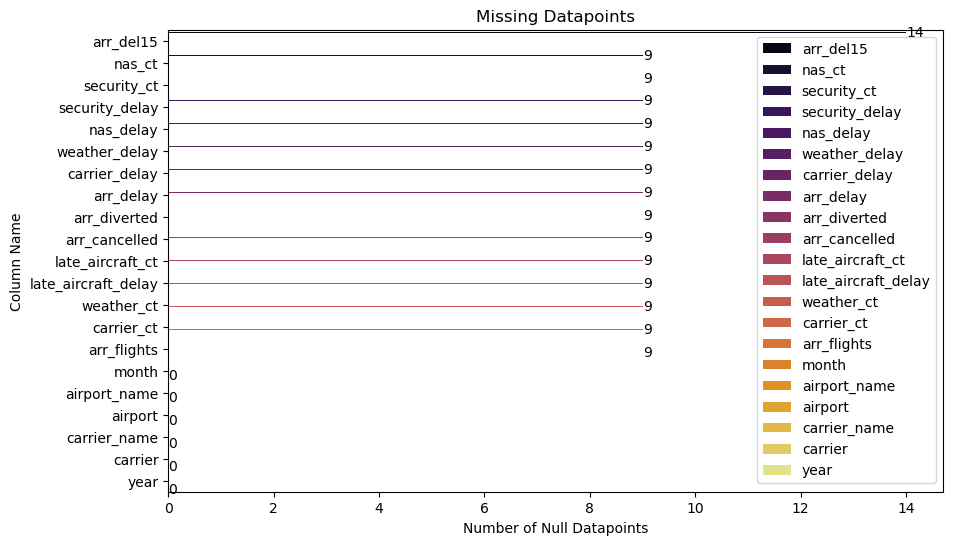

In [5]:
missing_data = data.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_data.values, y=missing_data.index, palette="inferno",hue = missing_data.index)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Missing Datapoints")
plt.xlabel("Number of Null Datapoints")
plt.ylabel("Column Name")
plt.show()

### #Observations v/s. Airport

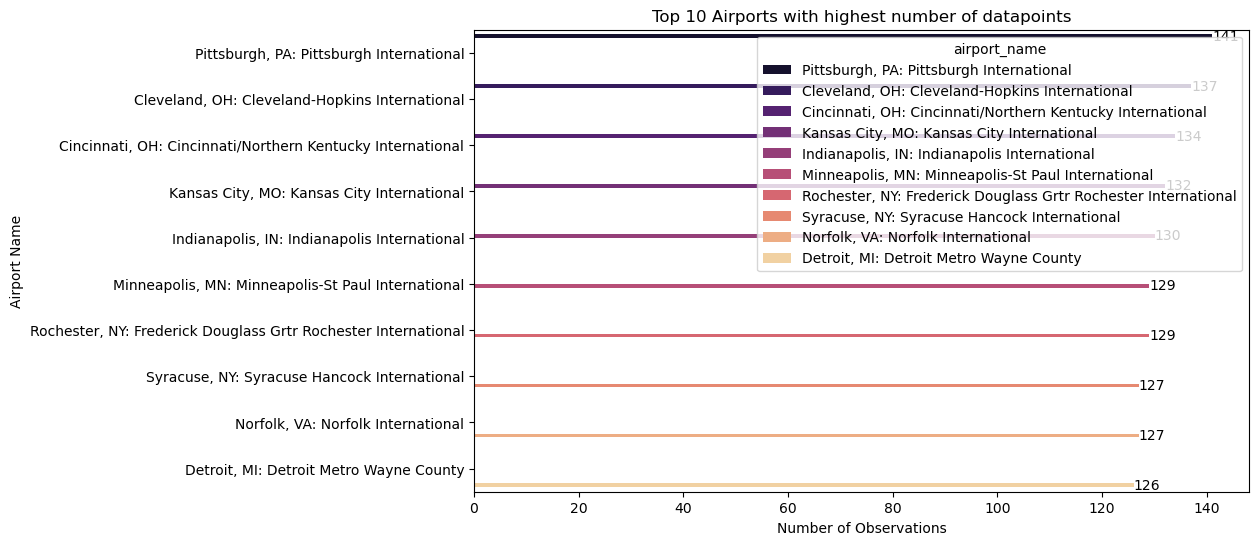

In [6]:
total_airports_largest = data.airport_name.value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=total_airports_largest.values, y=total_airports_largest.index, palette="magma",hue = total_airports_largest.index)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Top 10 Airports with highest number of datapoints")
plt.xlabel("Number of Observations")
plt.ylabel("Airport Name")
plt.show()

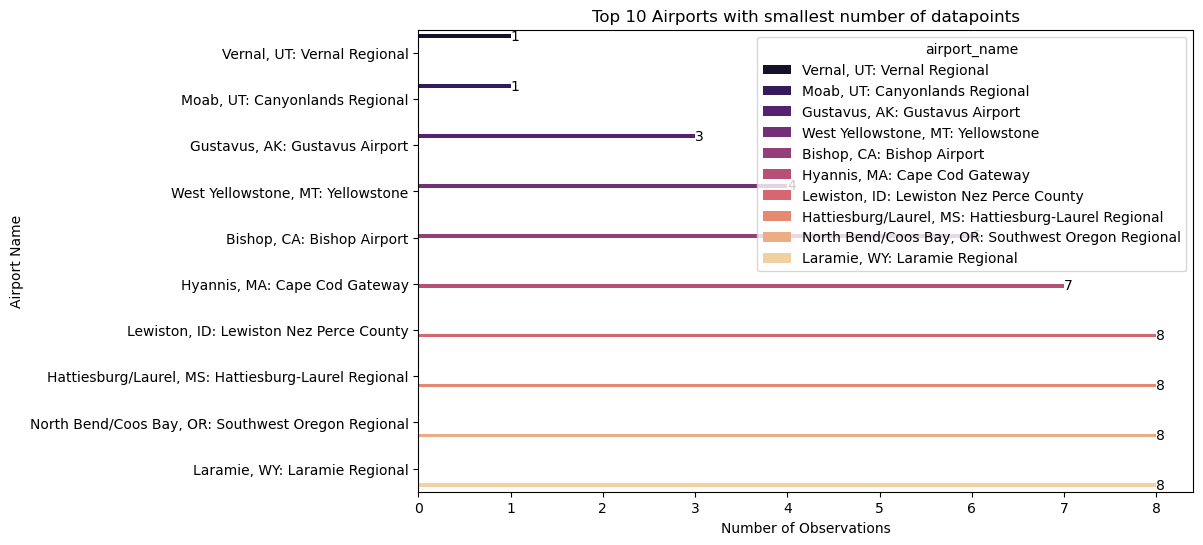

In [8]:
total_airports_smallest = data.airport_name.value_counts().nsmallest(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=total_airports_smallest.values, y=total_airports_smallest.index, palette="magma",hue = total_airports_smallest.index)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Top 10 Airports with smallest number of datapoints")
plt.xlabel("Number of Observations")
plt.ylabel("Airport Name")
plt.show()

### Delays v/s. Airport

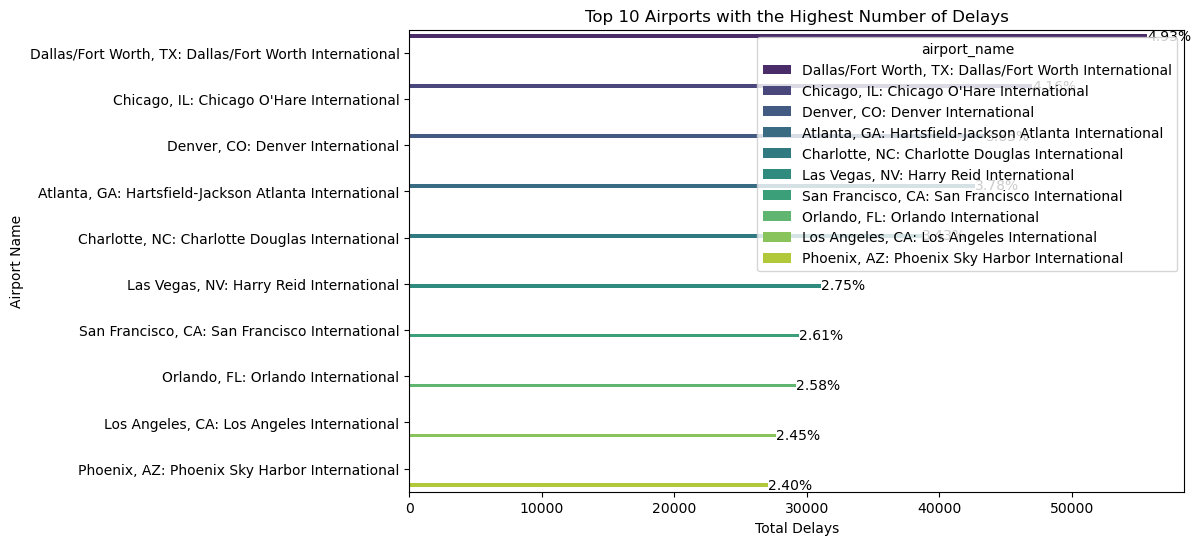

In [9]:
top_delayed_airports = data.groupby('airport_name')['arr_del15'].sum().nlargest(10)
total_delays = data['arr_del15'].sum()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_delayed_airports.values, y=top_delayed_airports.index, palette="viridis",hue = top_delayed_airports.index)

for container in ax.containers:
    percentages = [(val / total_delays) * 100 for val in container.datavalues]
    ax.bar_label(container, labels=[f'{p:.2f}%' for p in percentages], label_type='edge', fontsize=10)

plt.title("Top 10 Airports with the Highest Number of Delays")
plt.xlabel("Total Delays")
plt.ylabel("Airport Name")
plt.show()

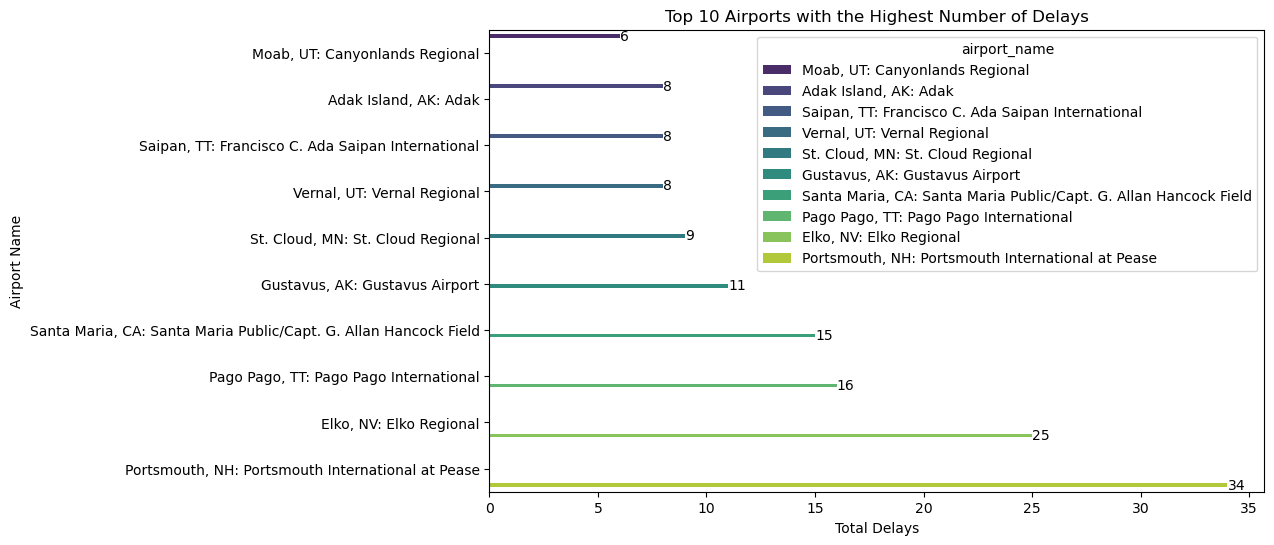

In [10]:
top_delayed_airports = data.groupby('airport_name')['arr_del15'].sum().nsmallest(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_delayed_airports.values, y=top_delayed_airports.index, palette="viridis",hue = top_delayed_airports.index)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title("Top 10 Airports with the Highest Number of Delays")
plt.xlabel("Total Delays")
plt.ylabel("Airport Name")
plt.show()

### Monthly Delays

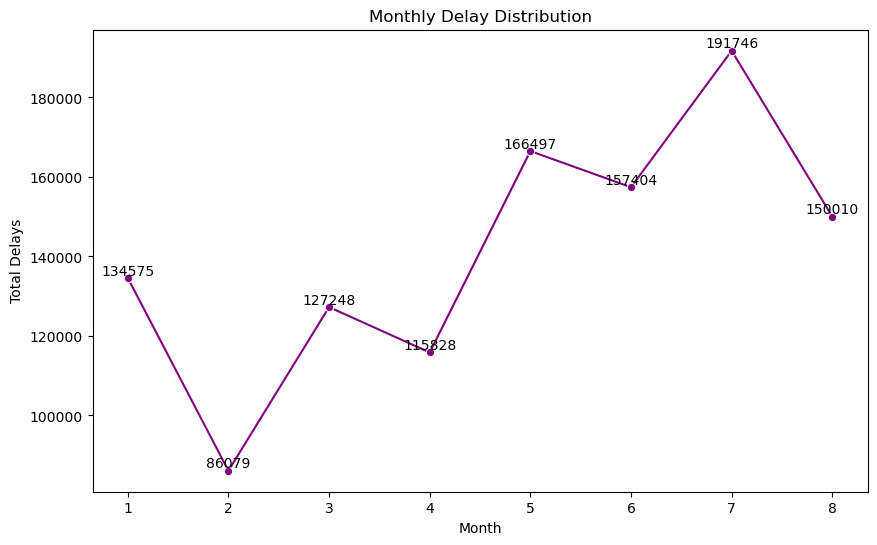

In [11]:
monthly_delays = data.groupby('month')['arr_del15'].sum()

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x=monthly_delays.index, y=monthly_delays.values, marker='o', color="purple")

for x, y in zip(monthly_delays.index, monthly_delays.values):
    ax.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10)

plt.title("Monthly Delay Distribution")
plt.xlabel("Month")
plt.ylabel("Total Delays")
plt.show()


### Delays v/s. Carriers


### Delay Causes

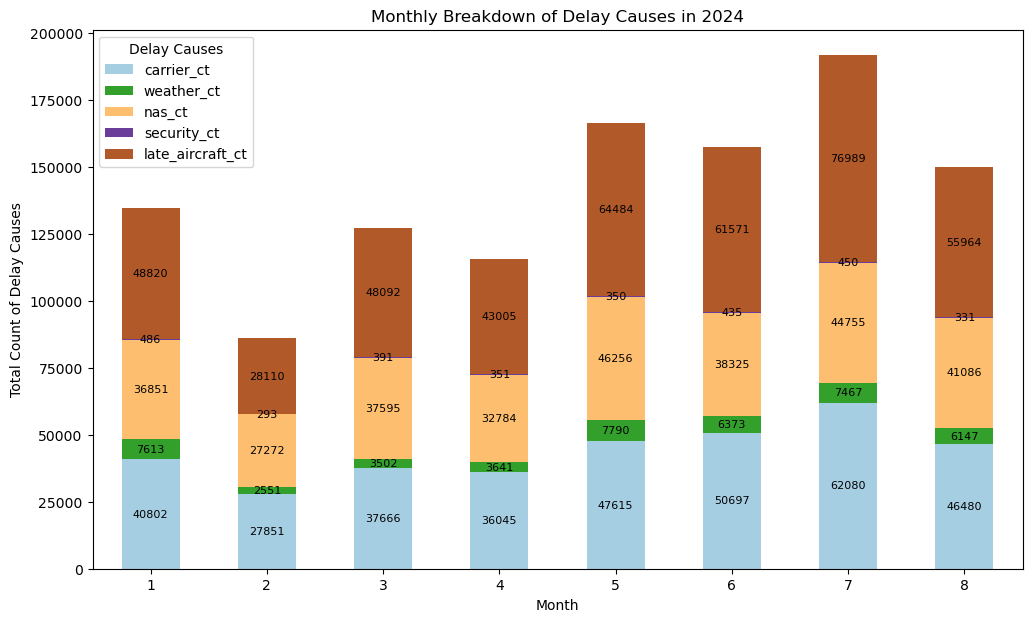

In [14]:
monthly_delay_causes = data.groupby('month')[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()

ax = monthly_delay_causes.plot(kind='bar', stacked=True, figsize=(12, 7), colormap="Paired")

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d', fontsize = 8)

plt.title("Monthly Breakdown of Delay Causes in 2024")
plt.xlabel("Month")
plt.ylabel("Total Count of Delay Causes")
plt.xticks(rotation=0)
plt.legend(title="Delay Causes")
plt.show()

In [18]:
data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))


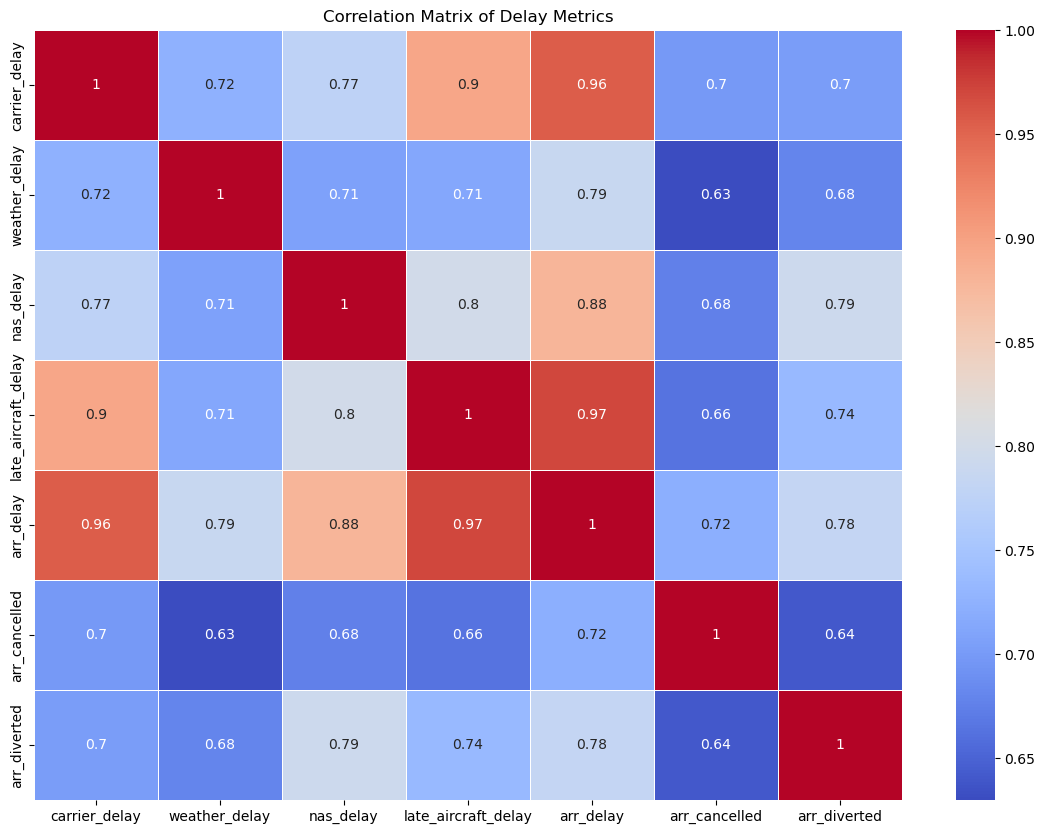

In [19]:
delay_reasons = ['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']
plt.figure(figsize=(14, 10))
corr_matrix = data[delay_reasons + ['arr_delay', 'arr_cancelled', 'arr_diverted']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Delay Metrics')
plt.show()


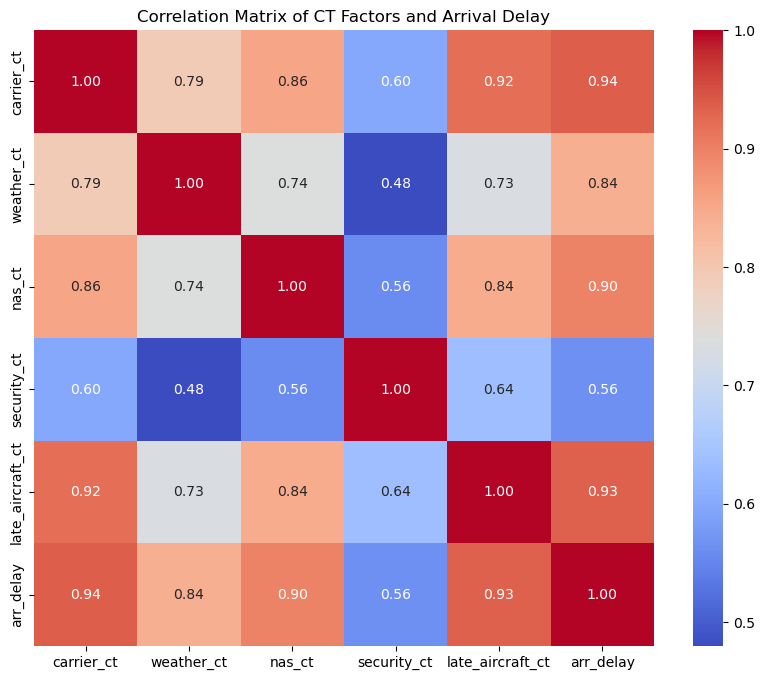

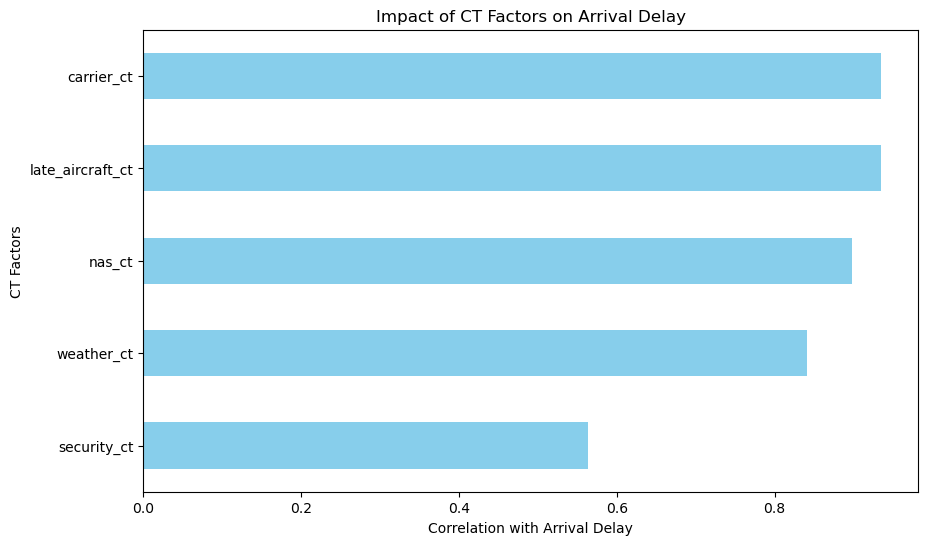

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (update the path as needed)
file_path = 'Airline_Delay_Cause.csv'
df = pd.read_csv(file_path)

# Select the 'CT' columns and 'arr_delay' for correlation analysis
ct_columns = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_delay']

# Filter the DataFrame to only include the relevant 'CT' columns and 'arr_delay'
ct_df = df[ct_columns]

# Drop rows with missing values to ensure accurate correlation analysis
ct_df = ct_df.dropna()

# Calculate the correlation matrix for the 'CT' columns and 'arr_delay'
ct_correlation_matrix = ct_df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ct_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of CT Factors and Arrival Delay')
plt.show()

# Extract the correlation of each CT factor with 'arr_delay'
ct_correlation_with_arr_delay = ct_correlation_matrix['arr_delay'].drop('arr_delay')

# Create a bar plot to visualize the impact of each CT factor on arrival delay
plt.figure(figsize=(10, 6))
ct_correlation_with_arr_delay.sort_values().plot(kind='barh', color='skyblue')
plt.title('Impact of CT Factors on Arrival Delay')
plt.xlabel('Correlation with Arrival Delay')
plt.ylabel('CT Factors')
plt.show()


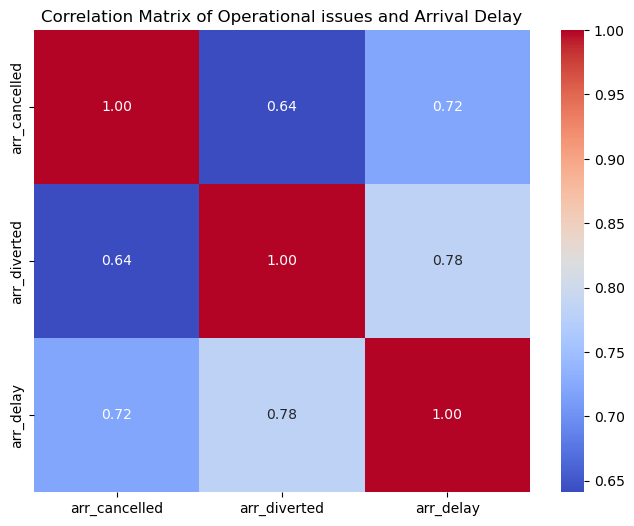

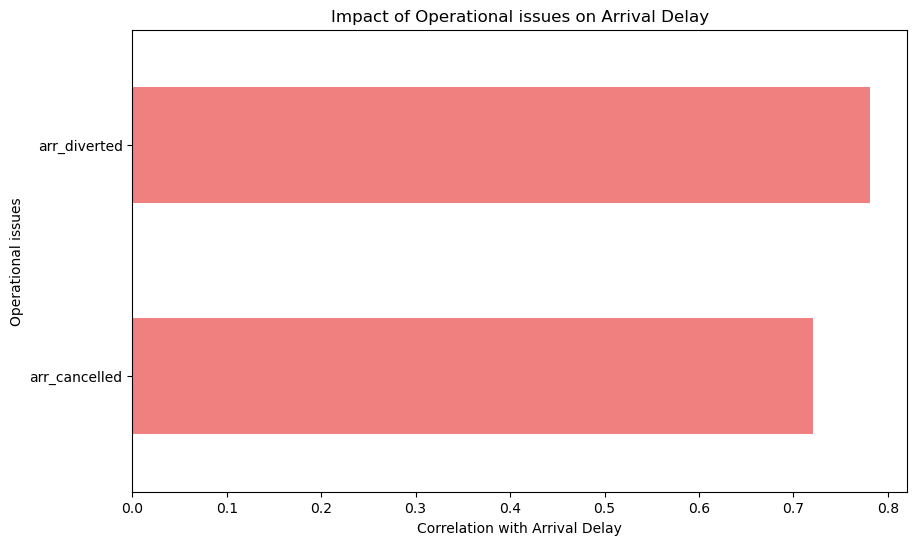

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (update the path as needed)
file_path = 'Airline_Delay_Cause.csv'
df = pd.read_csv(file_path)

# Select the operational metrics and 'arr_delay' for correlation analysis
operational_columns = ['arr_cancelled', 'arr_diverted', 'arr_delay']

# Filter the DataFrame to only include the relevant operational columns and 'arr_delay'
operational_df = df[operational_columns]

# Drop rows with missing values to ensure accurate correlation analysis
operational_df = operational_df.dropna()

# Calculate the correlation matrix for the operational metrics and 'arr_delay'
operational_correlation_matrix = operational_df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(operational_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Operational issues and Arrival Delay')
plt.show()

# Extract the correlation of each operational metric with 'arr_delay'
operational_correlation_with_arr_delay = operational_correlation_matrix['arr_delay'].drop('arr_delay')

# Create a bar plot to visualize the impact of each operational metric on arrival delay
plt.figure(figsize=(10, 6))
operational_correlation_with_arr_delay.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Impact of Operational issues on Arrival Delay')
plt.xlabel('Correlation with Arrival Delay')
plt.ylabel('Operational issues')
plt.show()


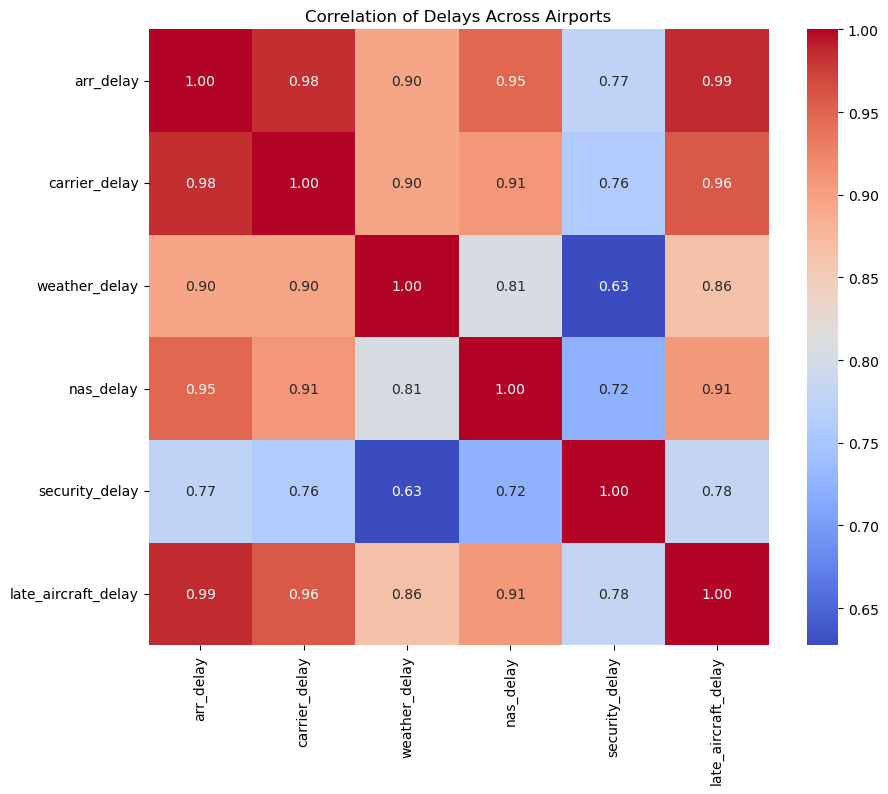

In [14]:
# Group the data by airport and calculate the average delay for each airport
airport_delay_df = df.groupby('airport')[['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].mean()

# Drop rows with missing values to ensure accurate correlation analysis
airport_delay_df = airport_delay_df.dropna()

# Calculate the correlation matrix for the delays across airports
airport_correlation_matrix = airport_delay_df.corr()

# Display the correlation matrix as a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(airport_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation of Delays Across Airports')
plt.show()





## Random Forest Classifier

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))


data['is_delayed'] = data['arr_delay'] > 15

# Select features and the target variable
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
target = 'is_delayed'


df_ml = data[features + [target]].dropna()

X_train, X_test, y_train, y_test = train_test_split(df_ml[features], df_ml[target], test_size=0.3, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       141
        True       1.00      1.00      1.00      4375

    accuracy                           1.00      4516
   macro avg       1.00      1.00      1.00      4516
weighted avg       1.00      1.00      1.00      4516

Confusion Matrix:
[[ 140    1]
 [   0 4375]]

Accuracy: 99.98%


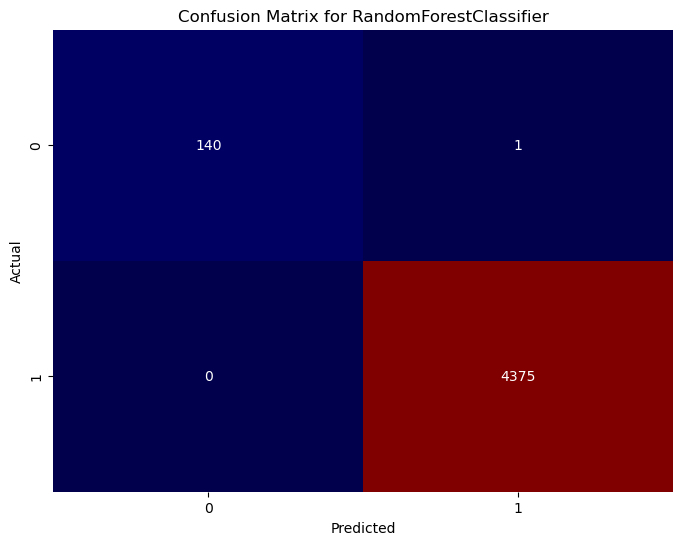

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='seismic', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

## SVM, KNN, Decision Classification

In [51]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


svm_model = SVC(gamma='auto')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
# print("SVM Classification Report:")
# print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))





SVM Confusion Matrix:
[[ 140    1]
 [   0 4375]]


In [50]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
# print("KNN Classification Report:")
# print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Confusion Matrix:
[[ 140    1]
 [   1 4374]]


In [49]:

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))


Decision Tree Confusion Matrix:
[[ 140    1]
 [   2 4373]]


# K- MEANS

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
data_cleaned = data[features].dropna()


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)


data_cleaned['cluster'] = clusters


centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=features)


cluster_sizes = data_cleaned['cluster'].value_counts()


print("Centroids of Clusters:")
print(centroids_df)
print("\nCluster Sizes:")
print(cluster_sizes)


Centroids of Clusters:
   carrier_delay  weather_delay     nas_delay  security_delay  \
0    1106.215999     205.593913    597.017480        5.127365   
1  117899.000000   23738.941176  53619.647059      418.882353   
2   22047.502242    4251.553812  14004.600897      137.504484   

   late_aircraft_delay  
0          1328.055251  
1        163491.647059  
2         28495.033632  

Cluster Sizes:
cluster
0    14588
2      446
1       17
Name: count, dtype: int64


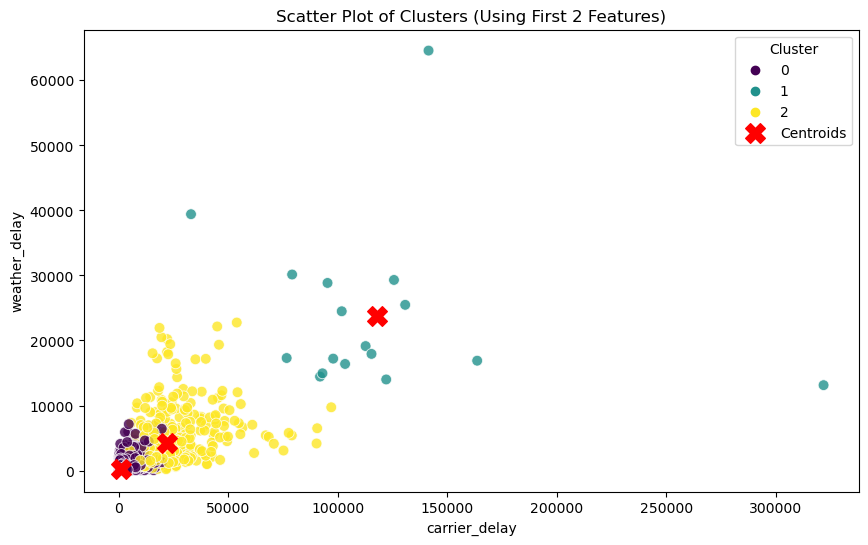

<Figure size 1000x600 with 0 Axes>

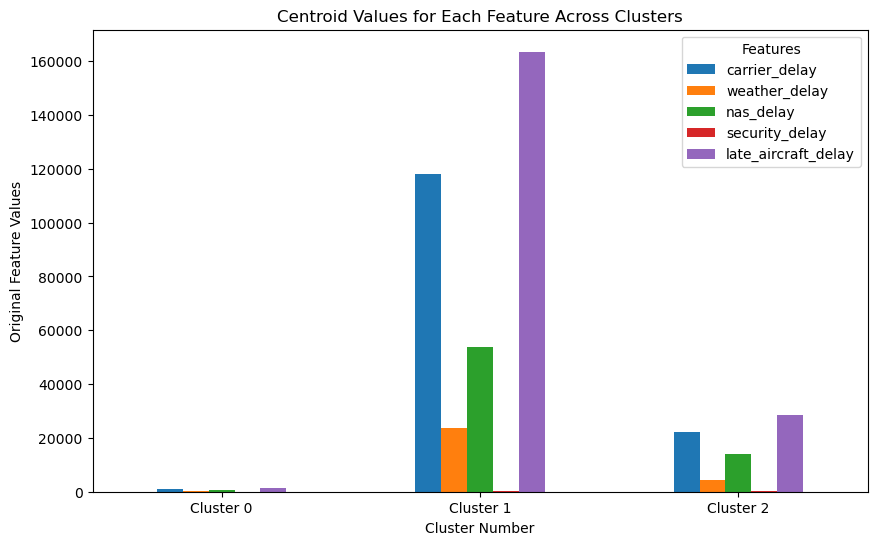

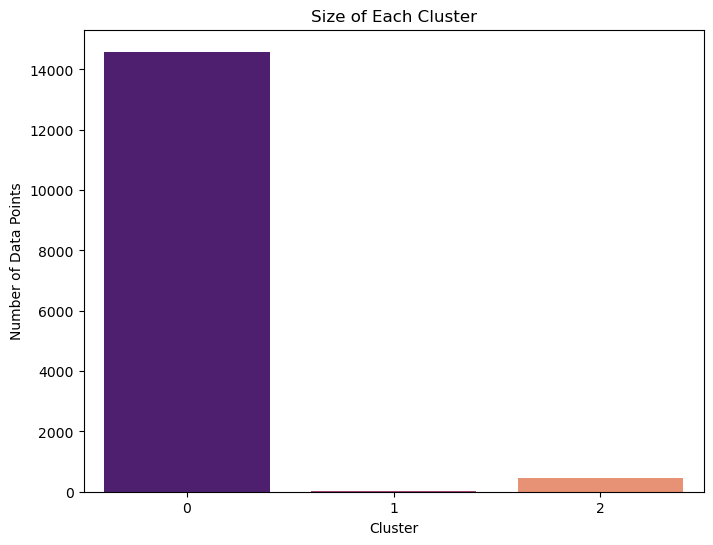

In [37]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_cleaned[features[0]], 
    y=data_cleaned[features[1]], 
    hue=data_cleaned['cluster'], 
    palette='viridis', 
    s=60, 
    alpha=0.8
)
plt.scatter(centroids_df[features[0]], centroids_df[features[1]], 
            color='red', marker='X', s=200, label='Centroids')
plt.title('Scatter Plot of Clusters (Using First 2 Features)')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(title='Cluster', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
centroids_df.plot(kind='bar', figsize=(10, 6))
plt.title('Centroid Values for Each Feature Across Clusters')
plt.xlabel('Cluster Number')
plt.ylabel('Original Feature Values')
plt.xticks(ticks=range(len(centroids_df)), labels=[f'Cluster {i}' for i in range(len(centroids_df))], rotation=0)
plt.legend(title='Features')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='magma')
plt.title('Size of Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()

/Users/alok/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


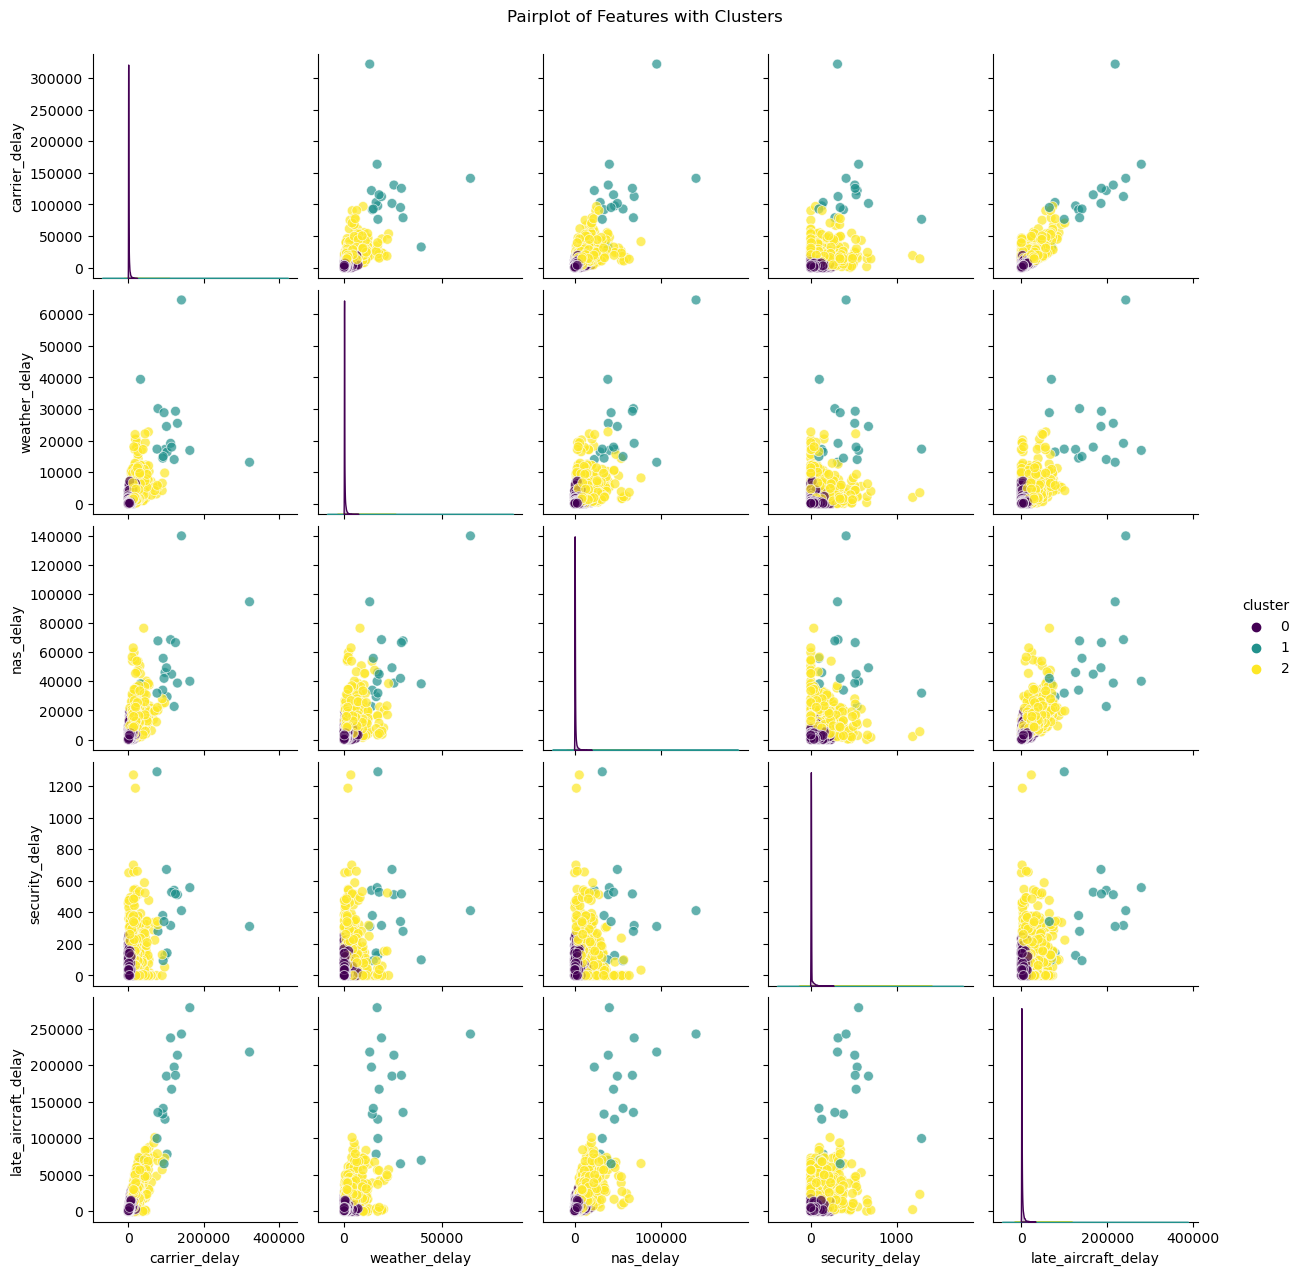

In [38]:
sns.pairplot(data_cleaned, hue='cluster', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.7, 's': 50})
plt.suptitle('Pairplot of Features with Clusters', y=1.02)
plt.show()

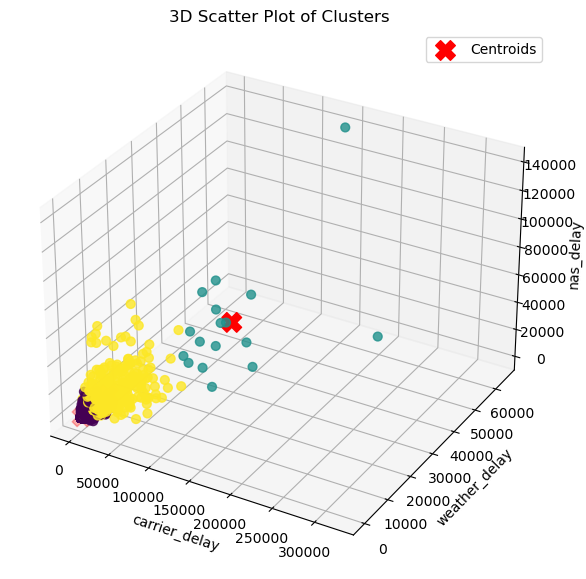

In [39]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data_cleaned[features[0]], 
    data_cleaned[features[1]], 
    data_cleaned[features[2]], 
    c=data_cleaned['cluster'], 
    cmap='viridis', 
    s=40, 
    alpha=0.8
)
# Plot centroids
ax.scatter(centroids_df[features[0]], centroids_df[features[1]], centroids_df[features[2]], 
           color='red', marker='X', s=200, label='Centroids')
ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
plt.legend(loc='upper right')
plt.show()

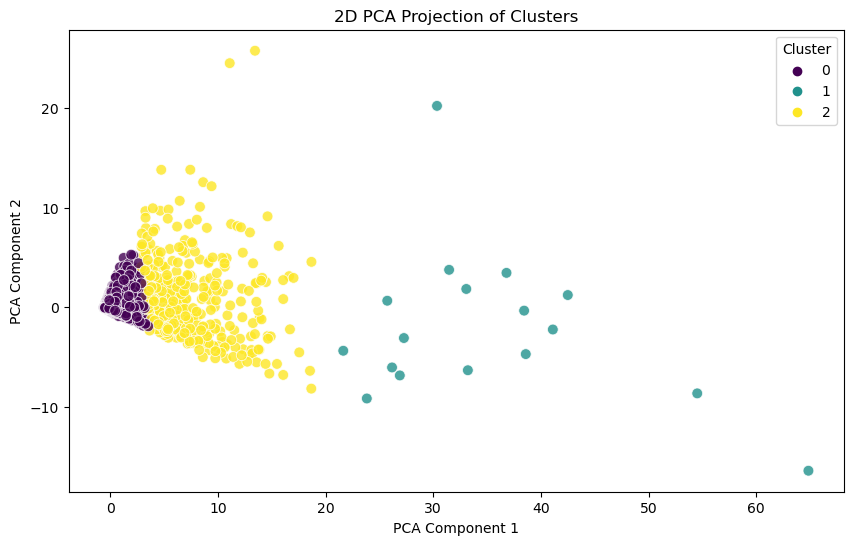

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Add PCA components to DataFrame
data_cleaned['PCA1'] = pca_result[:, 0]
data_cleaned['PCA2'] = pca_result[:, 1]

# Scatter plot of 2D PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_cleaned['PCA1'], 
    y=data_cleaned['PCA2'], 
    hue=data_cleaned['cluster'], 
    palette='viridis', 
    s=60, 
    alpha=0.8
)
plt.title('2D PCA Projection of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Random Forest Regressor

Mean Squared Error: 1209.864616421674
R^2 Score: 0.9703661996156102


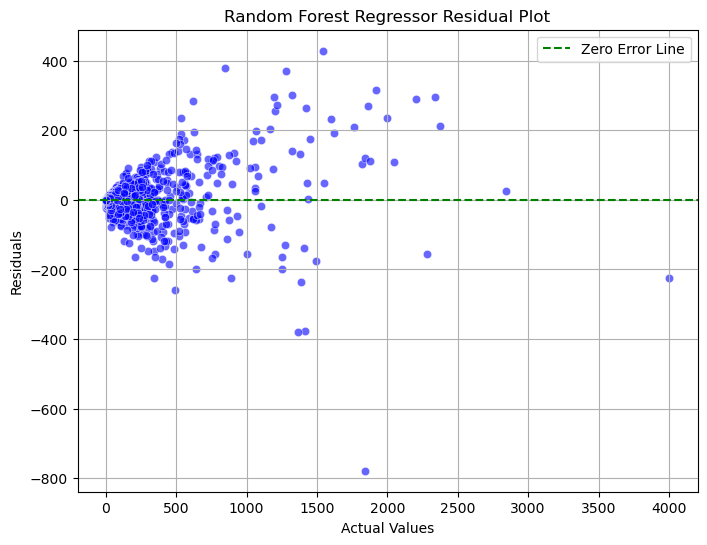

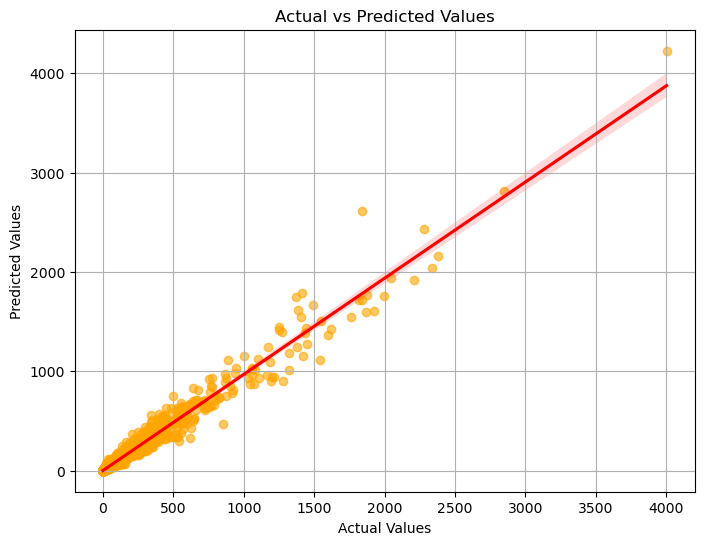

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Airline_Delay_Cause.csv')

# Create 'date' column
data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))

# Define features and target
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
target = 'arr_del15'

# Drop missing values
df_ml = data[features + [target]].dropna()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_ml[features], df_ml[target], test_size=0.3, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Residual Calculation
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='green', linestyle='--', label='Zero Error Line')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Random Forest Regressor Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.6, 'color': 'orange'}, line_kws={'color': 'red'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


SVR - Mean Squared Error: 5869.186956530251 R^2 Score: 0.8562431595008619
Decision Tree - Mean Squared Error: 2589.668002018412 R^2 Score: 0.9365700066007152
XGBoost - Mean Squared Error: 2450.7908346856207 R^2 Score: 0.9399715923639731


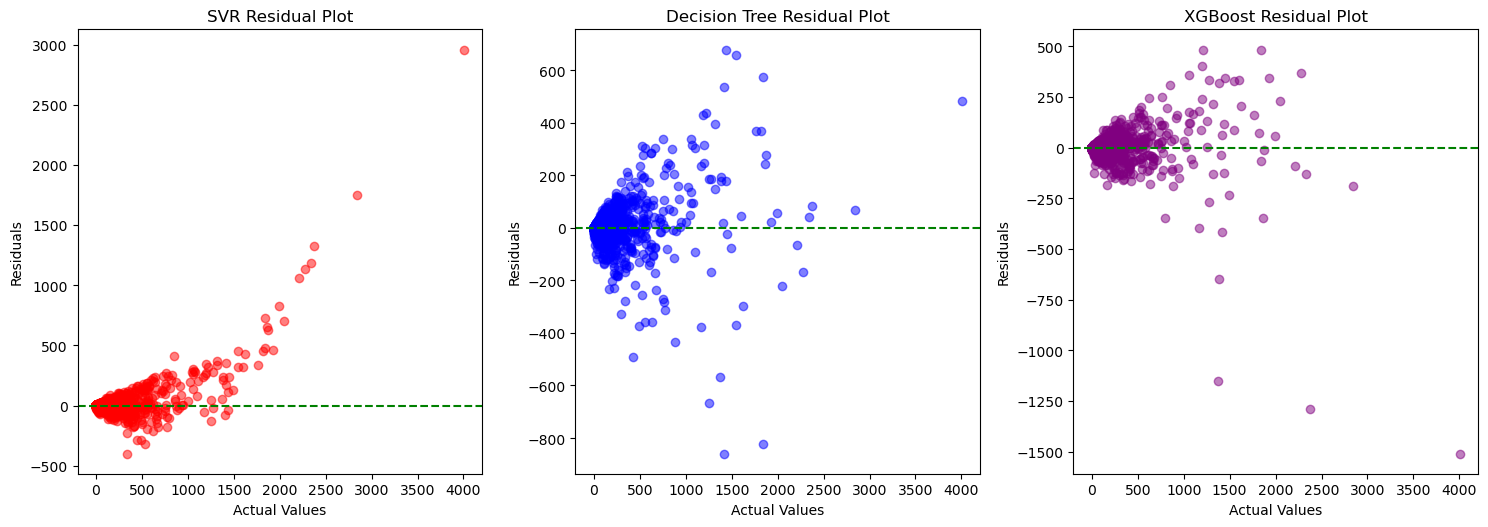

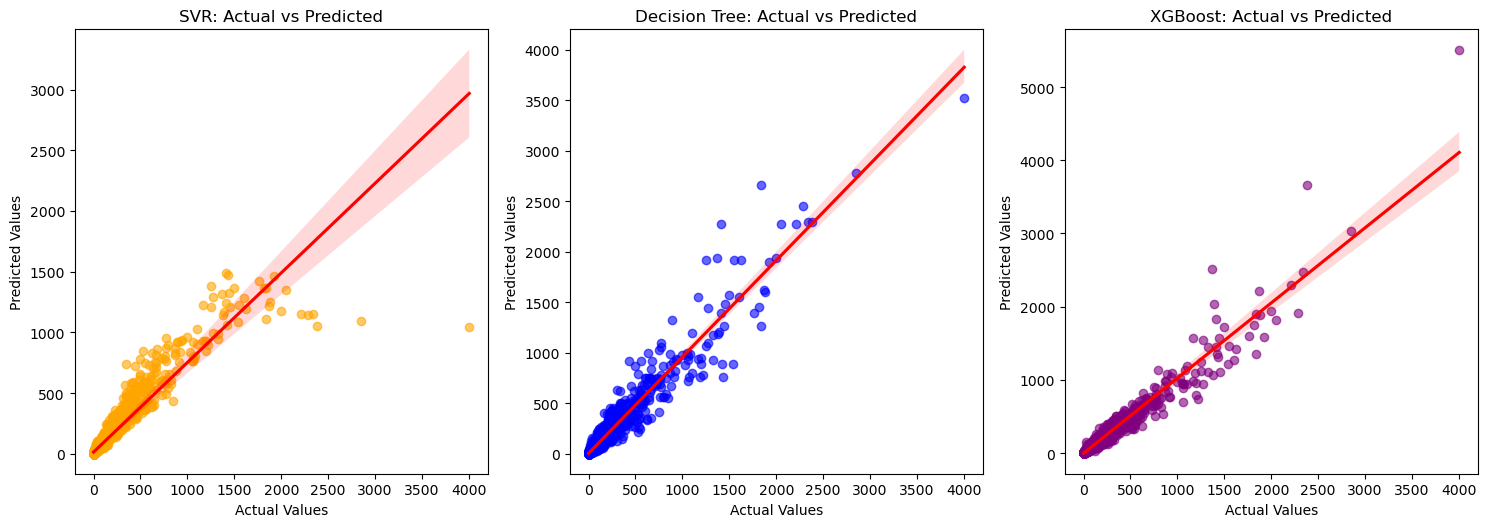

In [65]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Initialize models
svm_model = SVR(kernel='rbf', C=100, epsilon=0.1)
dt_model = DecisionTreeRegressor(random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)

# Train models
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict with models
svm_pred = svm_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Calculate residuals
svm_res = y_test - svm_pred
dt_res = y_test - dt_pred
xgb_res = y_test - xgb_pred

# Evaluate models
svm_mse, svm_r2 = mean_squared_error(y_test, svm_pred), r2_score(y_test, svm_pred)
dt_mse, dt_r2 = mean_squared_error(y_test, dt_pred), r2_score(y_test, dt_pred)
xgb_mse, xgb_r2 = mean_squared_error(y_test, xgb_pred), r2_score(y_test, xgb_pred)

# Print model performance
print("SVR - Mean Squared Error:", svm_mse, "R^2 Score:", svm_r2)
print("Decision Tree - Mean Squared Error:", dt_mse, "R^2 Score:", dt_r2)
print("XGBoost - Mean Squared Error:", xgb_mse, "R^2 Score:", xgb_r2)

# Plot Residuals for all models
plt.figure(figsize=(15, 15))

# SVR Residual Plot
plt.subplot(3, 3, 1)
plt.title('SVR Residual Plot')
plt.scatter(y_test, svm_res, alpha=0.5, color='red')
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

# Decision Tree Residual Plot
plt.subplot(3, 3, 2)
plt.title('Decision Tree Residual Plot')
plt.scatter(y_test, dt_res, alpha=0.5, color='blue')
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

# XGBoost Residual Plot
plt.subplot(3, 3, 3)
plt.title('XGBoost Residual Plot')
plt.scatter(y_test, xgb_res, alpha=0.5, color='purple')
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 15))

# SVR
plt.subplot(3, 3, 1)
sns.regplot(x=y_test, y=svm_pred, scatter_kws={'alpha': 0.6, 'color': 'orange'}, line_kws={'color': 'red'})
plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Decision Tree
plt.subplot(3, 3, 2)
sns.regplot(x=y_test, y=dt_pred, scatter_kws={'alpha': 0.6, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# XGBoost
plt.subplot(3, 3, 3)
sns.regplot(x=y_test, y=xgb_pred, scatter_kws={'alpha': 0.6, 'color': 'purple'}, line_kws={'color': 'red'})
plt.title('XGBoost: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

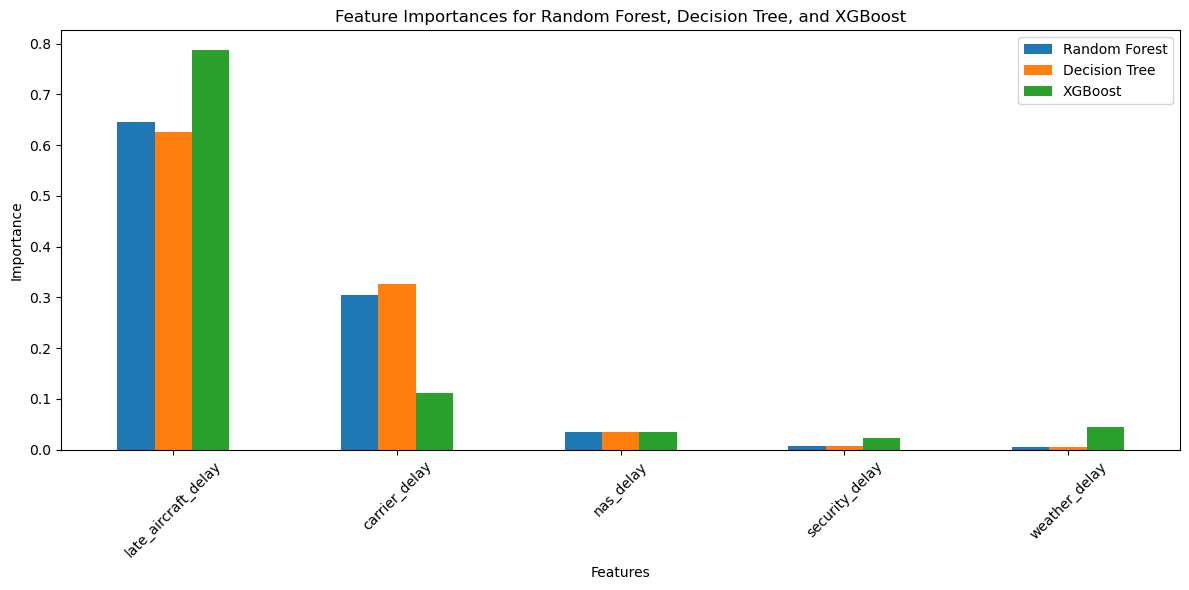

In [67]:
# Re-import necessary libraries and reload the dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Reload the dataset
file_path = 'Airline_Delay_Cause.csv'
data = pd.read_csv(file_path)

# Define features and target
data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))
features = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
target = 'arr_del15'

# Prepare data
df_ml = data[features + [target]].dropna()
X_train, X_test, y_train, y_test = train_test_split(df_ml[features], df_ml[target], test_size=0.3, random_state=42)

# Train models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)

# Extract feature importances
rf_importances = rf_model.feature_importances_
dt_importances = dt_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': features,
    'Random Forest': rf_importances,
    'Decision Tree': dt_importances,
    'XGBoost': xgb_importances
})

# Sort by Random Forest importance
importances_df.sort_values(by='Random Forest', ascending=False, inplace=True)
importances_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
importances_df

# Plot feature importances
plt.figure(figsize=(12, 8))
importances_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances for Random Forest, Decision Tree, and XGBoost')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ANN